In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [2]:
mapbox_api_key = 'pk.eyJ1IjoiamFuZXN1OTI3IiwiYSI6ImNsZW41aTh6NTFieXkzdm5tY3lqMXA1NGEifQ.rH1WFFd451UU1xzrJquBkQ'

In [3]:
bbl = pd.read_csv('./dataset_airbnb-scraper2.csv')

C:\Users\jsu\AppData\Local\Temp\ipykernel_24404\216562366.py:1: DtypeWarning: Columns (11,36,48,49,557,560,563,566,581,584,587,590,593,596,599,602,605,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,678,679,681,682,684,685,687,688,690,691,693,694,696,697,699,700,702,703,705,706,708,709,711,712,714,715,717,718,720,721,723,724,726,727,729,730,753,754,755) have mixed types. Specify dtype option on import or set low_memory=False.
  bbl = pd.read_csv('./dataset_airbnb-scraper2.csv')


In [ ]:
# checking type of every column in the dataset
bbl.dtypes

In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
bbl.isnull().sum()

In [4]:
bbl.describe()

additionalHosts/0/about  additionalHosts/0/id  additionalHosts/1/about  \
count                      0.0          4.500000e+02                      0.0   
mean                       NaN          2.184185e+08                      NaN   
std                        NaN          1.641420e+08                      NaN   
min                        NaN          5.338600e+04                      NaN   
25%                        NaN          7.101113e+07                      NaN   
50%                        NaN          1.786475e+08                      NaN   
75%                        NaN          3.850894e+08                      NaN   
max                        NaN          5.028248e+08                      NaN   

       additionalHosts/1/id  additionalHosts/2/about  additionalHosts/2/id  \
count          1.260000e+02                      0.0          2.100000e+01   
mean           2.612262e+08                      NaN          2.289651e+08   
std            1.708246e+08                      NaN          1.723101e+08   
min            8.202730e+05                      NaN          1.811192e+07   
25%            1.045274e+08                      NaN          7.971548e+07   
50%            2.370255e+08                      NaN          1.659349e+08   
75%            4.220475e+08                      NaN          3.888533e+08   
max            4.980722e+08                      NaN          4.980722e+08   

       location/lat  location/lng  numberOfGuests  occupancyPercentage  ...  \
count   1500.000000   1500.000000     1500.000000          1500.000000  ...   
mean      34.200130   -116.925334        7.748667            23.762060  ...   
std        0.124271      0.202293        4.179930            25.275656  ...   
min       33.815350   -117.397180        1.000000             0.000000  ...   
25%       34.230360   -116.952425        4.000000             5.980000  ...   
50%       34.240140   -116.882870        8.000000            13.680000  ...   
75%       34.249000   -116.855895       10.000000            34.190000  ...   
max       34.542150   -116.351000       16.000000           100.000000  ...   

       photos/141/caption  photos/142/caption  photos/143/caption  \
count                 0.0                 0.0                 0.0   
mean                  NaN                 NaN                 NaN   
std                   NaN                 NaN                 NaN   
min                   NaN                 NaN                 NaN   
25%                   NaN                 NaN                 NaN   
50%                   NaN                 NaN                 NaN   
75%                   NaN                 NaN                 NaN   
max                   NaN                 NaN                 NaN   

       photos/144/caption  photos/145/caption  pricing/rate/amount  \
count                 0.0                 0.0          1500.000000   
mean                  NaN                 NaN           526.745240   
std                   NaN                 NaN           674.349366   
min                   NaN                 NaN            23.000000   
25%                   NaN                 NaN           120.000000   
50%                   NaN                 NaN           422.000000   
75%                   NaN                 NaN           596.750000   
max                   NaN                 NaN          8000.000000   

       primaryHost/id  primaryHost/listingsCount  \
count    1.500000e+03                1500.000000   
mean     1.368441e+08                  95.916667   
std      1.351564e+08                 183.971393   
min      2.402300e+04                   1.000000   
25%      1.823418e+07                   1.000000   
50%      9.804527e+07                   4.000000   
75%      2.167201e+08                  48.000000   
max      4.979152e+08                 810.000000   

       primaryHost/totalListingsCount        stars  
count                     1500.000000  1428.000000  
mean                       153.386

In [5]:
# select the columns we need for analysis
columns = ['name', 'roomType', 'stars', 'address', 'numberOfGuests', 'pricing/rate/amount', \
          'pricing/rate/amountFormatted', 'pricing/rate/currency', 'pricing/rate/isMicrosAccuracy',\
          'pricing/rateType', 'url', 'primaryHost/firstName' ,'primaryHost/badges/0', 'primaryHost/badges/1', 'primaryHost/id',\
          'primaryHost/isSuperHost', 'primaryHost/responseRate', 'primaryHost/responseTime',\
          'occupancyPercentage', 'name', 'location/lng', 'location/lat', 'primaryHost/totalListingsCount', \
          'primaryHost/smartName', 'primaryHost/listingsCount', 'primaryHost/memberSince']

In [6]:
bbl = bbl[columns]

In [ ]:
print(bbl.columns.tolist())

In [ ]:
# examining the unique values of 'roomType'
bbl.roomType.unique()

In [7]:
# set up price category:
# cat1: under USD$200
# cat2: USD$201 - 400
# cat3: USD$401 - 600
# cat4: USD$601 - 800
# cat5: USD$801 - 1000
# cat6: USD$1000 up
bbl['price_category'] = None # initial
bbl.loc[bbl['pricing/rate/amount']<=200, 'price_category'] = 'under USD$200'
bbl.loc[bbl['pricing/rate/amount']<=400, 'price_category'] = 'USD$201 - 400'
bbl.loc[bbl['pricing/rate/amount']<=600, 'price_category'] = 'USD$401 - 600'
bbl.loc[bbl['pricing/rate/amount']<=800, 'price_category'] = 'USD$601 - 800'
bbl.loc[bbl['pricing/rate/amount']<=1000, 'price_category'] = 'USD$801 - 1000'
bbl.loc[bbl['pricing/rate/amount']>1000, 'price_category'] = 'USD$1000 up'

In [8]:
def price_category(value):
    if value <= 200:
        return "under USD$200"
    if 201 <= value <= 400:
        return "USD$201 - 400"
    elif 401 <= value <= 600:
        return "USD$401 - 600"
    elif 601 <= value <= 800:
        return "USD$601 - 800"
    elif 801 <= value <= 1000:
        return "USD$801 - 1000"
    elif value > 1000:
        return "USD$1000 up"
bbl['price_category'] = bbl['pricing/rate/amount'].map(price_category)

In [9]:
# cities
bbl_cities = bbl.groupby(['address'])['primaryHost/id'].count()\
    .reset_index().rename(columns={'primaryHost/id':'Number'})\
    .sort_values(by=['Number'], ascending=False)

bbl_cities['precent'] = round((bbl_cities['Number'] / bbl_cities['Number'].sum()) * 100, 2)
bbl_cities

address  Number  precent
9           Big Bear Lake, California, United States     731    48.73
11               Big Bear, California, United States     188    12.53
28         Lake Arrowhead, California, United States     119     7.93
35           Palm Springs, California, United States      76     5.07
20     Desert Hot Springs, California, United States      43     2.87
7           Big Bear City, California, United States      39     2.60
40              Riverside, California, United States      29     1.93
19              Crestline, California, United States      28     1.87
32          Moreno Valley, California, United States      25     1.67
41        Running Springs, California, United States      22     1.47
21               Fawnskin, California, United States      17     1.13
47            Victorville, California, United States      17     1.13
30             Loma Linda, California, United States      14     0.93
25               Hesperia, California, United States      13     0.87
24      Green Valley Lake, California, United States      13     0.87
45              Sugarloaf, California, United States      12     0.80
43         San Bernardino, California, United States      10     0.67
49           Yucca Valley, California, United States       9     0.60
37               Redlands, California, United States       9     0.60
33         Morongo Valley, California, United States       8     0.53
46             Twin Peaks, California, United States       8     0.53
4                Beaumont, California, United States       8     0.53
23          Grand Terrace, California, United States       7     0.47
1            Apple Valley, California, United States       7     0.47
36            Pioneertown, California, United States       5     0.33
26               Highland, California, United States       5     0.33
29                Landers, California, United States       4     0.27
17                 Colton, California, United States       3     0.20
48                Yucaipa, California, United States       3     0.20
39              Rimforest, California, United States       3     0.20
42  San Bernardino County, California, United States       2     0.13
44              Skyforest, California, United States       2     0.13
0            Angelus Oaks, California, United States       2     0.13
27         Johnson Valley, California, United States       2     0.13
31                Mentone, California, United States       1     0.07
12          Big bear lake, California, United States       1     0.07
2          Arrowbear lake, California, United States       1     0.07
3                 Banning, California, United States       1     0.07
5           Big Bear CIty, California, United States       1     0.07
6          Big Bear City , California, United States       1     0.07
8          Big Bear Lake , California, United States       1     0.07
10                      Big Bear Lake, United States       1     0.07
13            Bloomington, California, United States       1     0.07
34               Oak Glen, California, United States       1     0.07
14                         California, United States       1     0.07
15               Calimesa, California, United States       1     0.07
16          Cherry Valley, California, United States       1     0.07
38                 Rialto, California, United States       1     0.07
18             Crestline , California, United States       1     0.07
22           Forest Falls, California, United States       1     0.07
50          big bear lake, California, United States       1     0.07

In [10]:
# We only consider these cities:
# Big Bear Lake, California, United States
# Big Bear, California, United States
# Lake Arrowhead, California, United States
# Big Bear City, California, United States

city_list = ['Big Bear Lake, California, United States','Big Bear, California, United States','Lake Arrowhead, California, United States','Big Bear City, California, United States']
filtered_cities = bbl[bbl['address'].isin(city_list)]

### Correlation between different variables


In [ ]:
corr = filtered_cities.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
filtered_cities.columns

In [11]:
# Check listings available by grouping by roomType.
bbl_roomtype = bbl.groupby(['roomType'])['primaryHost/id'].count().reset_index()\
    .rename(columns={'primaryHost/id': 'Number'})\
    .sort_values(['Number'], ascending=False)
bbl_roomtype['percent'] = round((bbl_roomtype['Number'] / bbl_roomtype['Number'].sum()) * 100, 2)
bbl_roomtype

roomType  Number  percent
10                         Entire home     582    38.80
4                         Entire cabin     516    34.40
26                Private room in home     135     9.00
5                        Entire chalet      66     4.40
17                        Entire villa      26     1.73
13                  Entire rental unit      23     1.53
6                         Entire condo      23     1.53
7                       Entire cottage      18     1.20
15                    Entire townhouse      13     0.87
8                   Entire guest suite      12     0.80
34                 Shared room in home      11     0.73
9                    Entire guesthouse       9     0.60
2                             Campsite       7     0.47
24         Private room in guest suite       6     0.40
16                Entire vacation home       5     0.33
21               Private room in cabin       5     0.33
19            Private room in bungalow       4     0.27
14           Entire serviced apartment       3     0.20
1                            Camper/RV       3     0.20
31              Room in boutique hotel       3     0.20
36                Shared room in villa       3     0.20
25          Private room in guesthouse       2     0.13
35               Shared room in hostel       2     0.13
32                      Room in resort       2     0.13
29  Private room in serviced apartment       2     0.13
37                           Tiny home       2     0.13
23     Private room in casa particular       2     0.13
22           Private room in camper/rv       2     0.13
18   Private room in bed and breakfast       2     0.13
12                        Entire place       2     0.13
3                      Entire bungalow       2     0.13
27              Private room in hostel       1     0.07
28              Private room in resort       1     0.07
30           Private room in townhouse       1     0.07
20                 Private room in bus       1     0.07
33    Shared room in bed and breakfast       1     0.07
11                         Entire loft       1     0.07
0                                 Barn       1     0.07

In [12]:
avg_price_by_rating = bbl.groupby(['stars']) \
    .agg({'primaryHost/firstName': 'count', 'pricing/rate/amount': 'mean'}).reset_index()\
    .rename(columns={'primaryHost/firstName': 'count'})\
    .sort_values(['count'], ascending=False)
avg_price_by_rating

stars  count  pricing/rate/amount
104   5.00    182           699.175055
96    4.92     54           495.870370
101   4.97     47           585.212766
100   4.96     45           592.177778
98    4.94     45           421.600000
..     ...    ...                  ...
5     3.44      1            81.000000
4     3.43      1            26.000000
53    4.49      1           554.000000
2     3.38      1            49.000000
0     3.29      1           672.000000

[105 rows x 3 columns]

### Data Visualization

In [13]:
# Check host that has most listings
top_host = bbl[['primaryHost/firstName', 'primaryHost/id','url']].groupby(['primaryHost/firstName', 'primaryHost/id'])['url'] \
                             .count().nlargest(20)
top_host

primaryHost/firstName  primaryHost/id
Destination Big Bear   7041175           152
Cool Cabins            127532570          44
Big Bear Vacations     84772237           42
Claire                 142491584          25
Sleepy Forest Resort   499244             24
Agustin                346270129          20
Mike                   7488275            20
Evolve                 126644161          16
Vacasa California      111814852          16
Big Bear Getaway       432348935          14
Rs                     39186089           13
Stone                  349791512          12
Holly                  163330593          11
Mario & Ivette         8783642            11
Megan                  152599094          11
Kim                    200260707          10
Bear Vacation          99394255            9
Mark                   8691458             9
Fellipe                16782335            8
Sarah                  305754294           8
Name: url, dtype: int64

C:\Users\jsu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


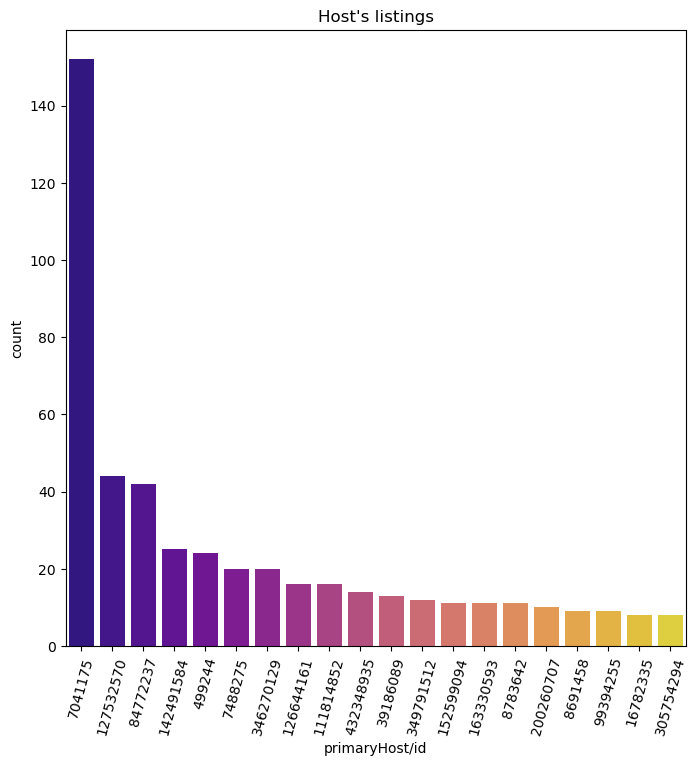

In [14]:
sns.countplot(bbl['primaryHost/id'], palette="plasma", order=bbl['primaryHost/id'].value_counts().iloc[:20].index)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(rotation=75)
plt.title("Host's listings")
plt.show()

<AxesSubplot:xlabel='numberOfGuests', ylabel='Count'>

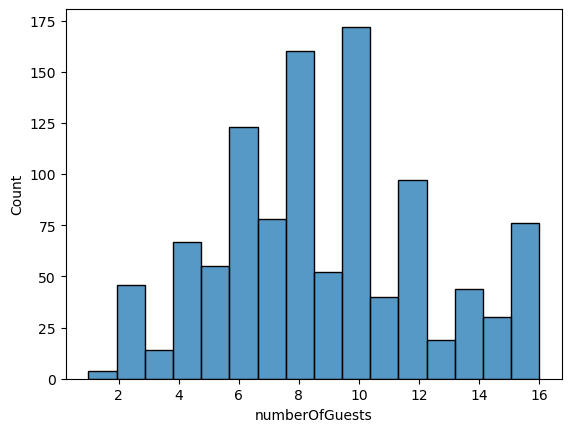

In [15]:
# view listing counts by the number of guests
sns.histplot(data=filtered_cities, x="numberOfGuests")

C:\Users\jsu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Room Type')

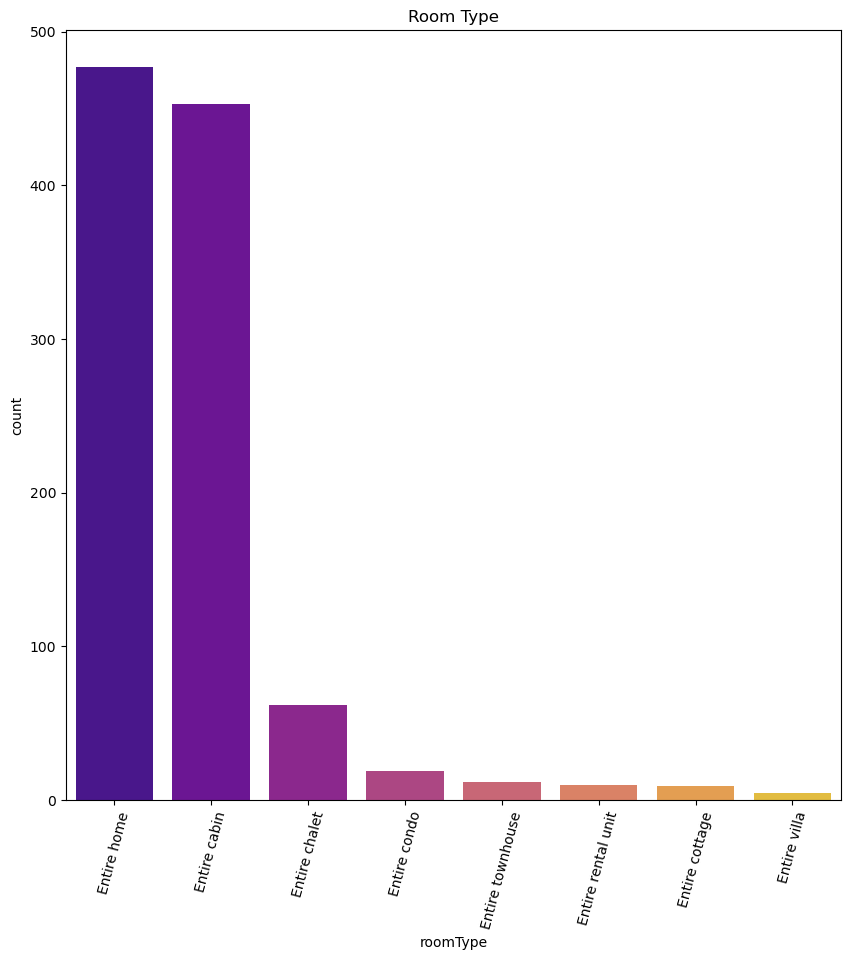

In [16]:
# view listing counts by room types, showing top 8 types only
sns.countplot(filtered_cities['roomType'], palette="plasma", order=filtered_cities['roomType'].value_counts().iloc[:8].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(rotation=75)
plt.title('Room Type')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

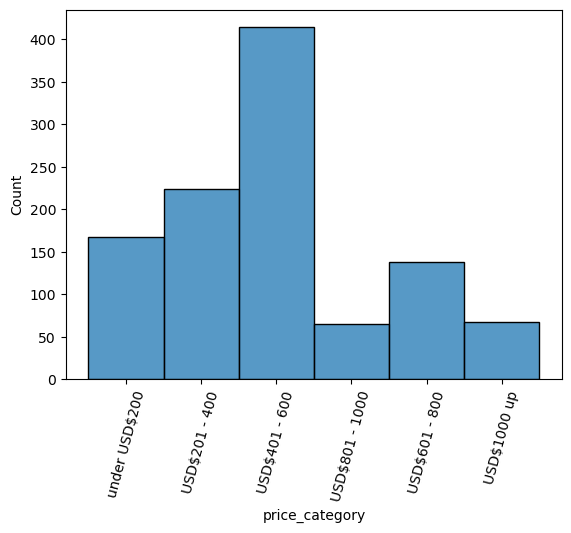

In [17]:
# view listing counts by price category
sns.histplot(data=filtered_cities, x="price_category")
plt.xticks(rotation=75)

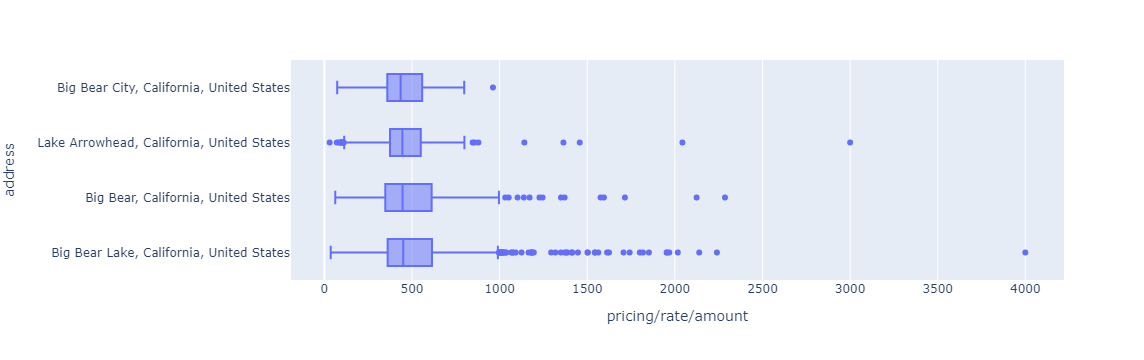

In [18]:
# daily prices by address
fig = px.box(filtered_cities, x="pricing/rate/amount", y="address")
fig.show()

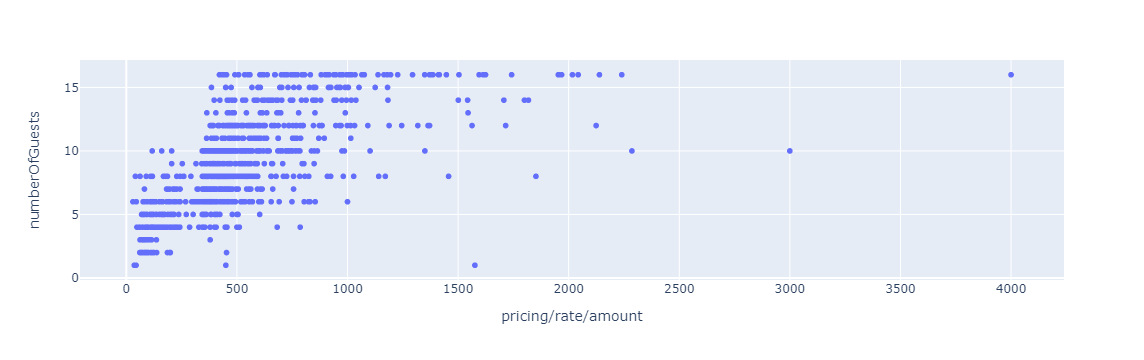

In [19]:
# daily prices by number of guests
fig = px.scatter(filtered_cities, x='pricing/rate/amount', y='numberOfGuests')
fig.show()

## Map

In [20]:
# take a single example to test logic of getting listing id
test_url = bbl['url'].iloc[0]
print('Test URL:', test_url)
print('Listing ID:', test_url.split('/')[-1])

Test URL: https://www.airbnb.com/rooms/47701543
Listing ID: 47701543


In [21]:
# create plot dataframe
df_plot = filtered_cities.copy()
# feature #1 - listing id
df_plot['listing_id'] = df_plot.apply(lambda x: x['url'].split('/')[-1], axis=1)

In [22]:
# feature #2 - header (listing id + listing name)
df_plot['header'] = df_plot.apply(lambda x: x['listing_id'] + ' - ' + x['primaryHost/firstName'], axis=1)
df_plot['header'].head()

0    47701543 - Cool Cabins
1    48212662 - Cool Cabins
2           49001579 - Hayk
3           16015622 - Mark
4         8487701 - Melissa
Name: header, dtype: object

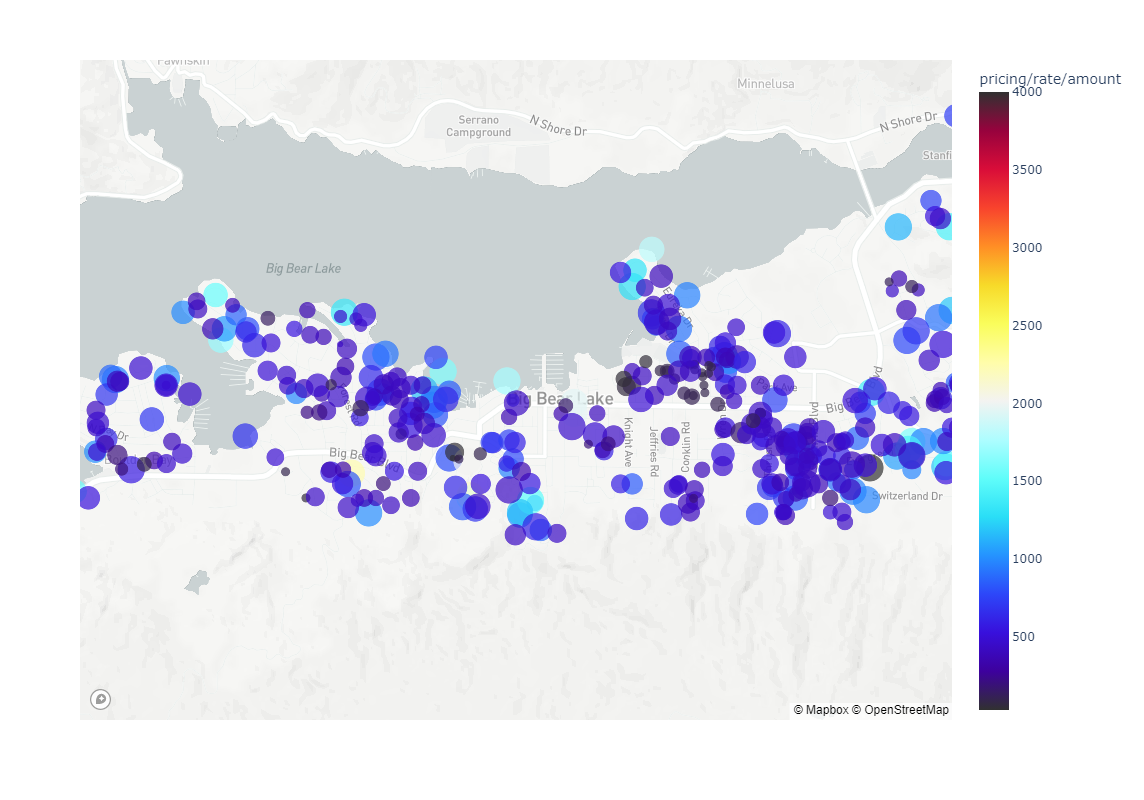

In [23]:
# set mapbox key
px.set_mapbox_access_token(mapbox_api_key)

# create scatter plot
fig = px.scatter_mapbox(
    df_plot, 
    lat="location/lat", 
    lon="location/lng",     
    color="pricing/rate/amount", 
    size="numberOfGuests", 
    color_continuous_scale=px.colors.cyclical.Edge,
    hover_name="header",
    zoom=13
)
# modify height to show all of siesta key (town specific)
fig.update_layout(
    height=800
)
fig.show()

In [24]:
# Let's see the main room types only 
room_list = ['Entire home', 'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire townhouse', 'Entire rental unit', 'Entire cottage', 'Entire villa']
filtered_room = filtered_cities[filtered_cities['roomType'].isin(room_list)]

In [25]:
# create plot dataframe
df_plot_2 = filtered_room.copy()
# feature #1 - listing id
df_plot_2['listing_id'] = df_plot_2.apply(lambda x: x['url'].split('/')[-1], axis=1)
# feature #2 - header (listing id + listing name)
df_plot_2['header'] = df_plot_2.apply(lambda x: x['listing_id'] + ' - ' + x['primaryHost/firstName'], axis=1)
df_plot_2['header'].head()

0    47701543 - Cool Cabins
1    48212662 - Cool Cabins
2           49001579 - Hayk
3           16015622 - Mark
4         8487701 - Melissa
Name: header, dtype: object

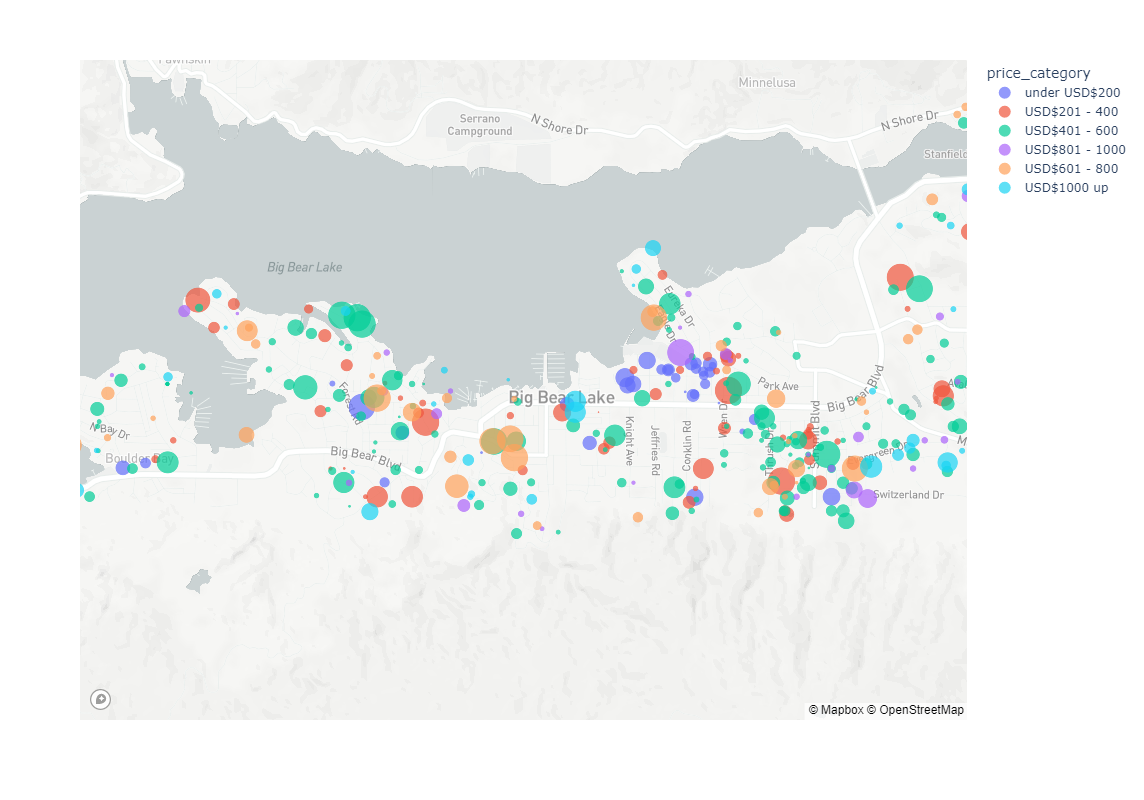

In [26]:
# Check how relationship between price and occupancy 
# create scatter plot
fig = px.scatter_mapbox(
    df_plot_2, 
    lat="location/lat", 
    lon="location/lng",     
    color="price_category", 
    size="occupancyPercentage", 
    color_continuous_scale=px.colors.cyclical.Edge,
    hover_name="header",
    zoom=13
)
# modify height to show all of siesta key (town specific)
fig.update_layout(
    height=800
)
fig.show()